In [7]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
rating = pd.read_csv('./ml-latest-small/ratings.csv')
movies = pd.read_csv('./ml-latest-small/movies.csv')
links = pd.read_csv('./ml-latest-small/links.csv')
tags = pd.read_csv('./ml-latest-small/tags.csv')

In [9]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### QUESTION 35: Precision and Recall are defined by the mathematical expressions given by equations 12 and 13 respectively. Please explain the meaning of precision and recall in your own words.

Precision is the number of items that were recommended to the user that the user liked over the ste of items recommended to the user. Recall is the set of items recommended to the user that the user liked over the set of items liked by the user.

#### QUESTION 36: Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using k-NN collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use the k found in question 11 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.

In [35]:
from collections import defaultdict
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.model_selection import KFold
from surprise import Dataset
from surprise import Reader

In [36]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(rating[['userId','movieId','rating']], reader=reader)

In [56]:
def drop_user(test, t, threshold=3):
    count = {}
    likes = {}
    
    # for each user in the test set, count how many movies they liked and how many movies they rated
    for (user, i, ratings) in test:
        if user not in count:
            count[user] = 0
        count[user] += 1
        if user not in likes:
            likes[user] = 0
        if ratings >= threshold:
            likes[user] += 1
            
    result = []
    for (user, i, ratings) in test:
        if count[user] >= t and likes[user] > 0:
            result.append((user, i, ratings))
    
    return result

In [57]:
def get_precision_recall(y_pred, t, thresh):
    
    # map the prediction to each user
    mapped_dict = defaultdict(list)

    for userid, i, r_ui, est, j in y_pred:
        mapped_dict[userid].append((est, r_ui))

    precision_dict = {}
    recall_dict = {}
    for userid, ratings in mapped_dict.items():
        
        ratings.sort(key=lambda x: x[0], reverse=True)   # sort user ratings
        num_rec = t           # number of recommended items
        total = 0             # number of recommended and liked items
        num_like = 0          # number of liked items
        
        for i in range(t):
            if ratings[i][1] >= thresh:
                total += 1
        
        # get number of liked items
        for i, r_ui in ratings:
            if r_ui >= thresh:
                num_like += r_ui

        # calculate precision and recall
        precision_dict[userid] = total / num_rec
        recall_dict[userid] = total / num_like

    return precision_dict, recall_dict

In [60]:
def plot_data(precision, recall, t):
    plt.figure()
    plt.scatter(t, precision, color='blue')
    plt.xlabel('Recommendation List Size (t)')
    plt.ylabel('Precision')
    plt.title('Precision plot')
    plt.show()
    
    plt.figure()
    plt.scatter(t, recall, color='blue')
    plt.xlabel('Recommendation List Size (t)')
    plt.ylabel('Recall', fontsize=16)
    plt.title('Recall plot')
    plt.show()
    
    plt.figure()
    plt.scatter(precision, recall, color='red')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Recall vs. Precision Plot')
    plt.show()

In [65]:
kf = KFold(n_splits=10)

avg_knn_precision = []
avg_knn_recall = []

for t in range(1,26):
    precision_list = []
    recall_list = []
    for train, test in kf.split(data):
        
        # create KNN object, fit and predict the data
        knn = KNNWithMeans(k=10, sim_options={'name': 'pearson'})
        knn.fit(train)
        testset = drop_user(test, t)
        y_pred = knn.test(testset)
        
        # get precision and recall dicts containing the user and their corresponding prec and recall values
        precision, recall = get_precision_recall(y_pred, t, 3)
        
        sum_prec = 0
        sum_recall = 0
        for k in precision:
            sum_prec += precision[k]
        for k in recall:
            sum_recall += recall[k]
        sum_prec /= len(precision)
        sum_recall /= len(recall)
        
        precision_list.append(sum_prec)
        recall_list.append(sum_recall)
    
    # get average of precision and recall
    sum_p = 0
    sum_r = 0
    for i in precision_list:
        sum_p += i
    for i in recall_list:
        sum_r += i
    avg_knn_precision.append(sum_p/len(precision_list))
    avg_knn_recall.append(sum_p/len(recall_list))
    
    

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

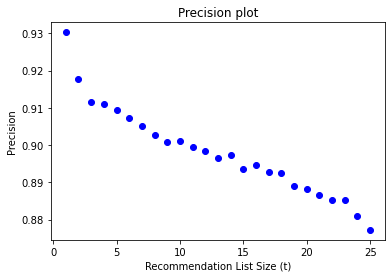

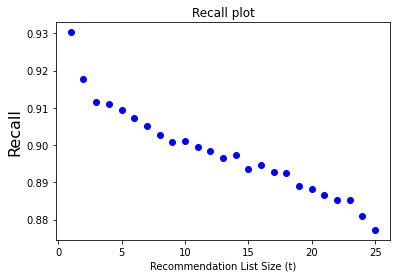

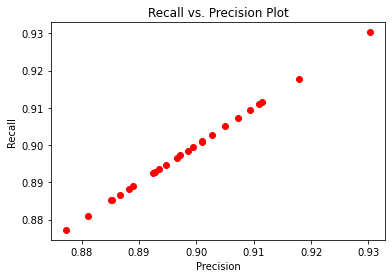

In [66]:
t = [*range(1, 26, 1)]
plot_data(avg_knn_precision, avg_knn_recall, t)

#### QUESTION 37: Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using NNMF-based collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use optimal number of latent factors found in question 18 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.

In [ ]:
kf = KFold(n_splits=10)

avg_nmf_precision = []
avg_nmf_recall = []

for t in range(1,26):
    precision_list = []
    recall_list = []
    for train, test in kf.split(data):
        
        # create KNN object, fit and predict the data
        nmf = NMF(n_factors=20, biased=False)
        nmf.fit(train)
        testset = drop_user(test, t)
        y_pred = nmf.test(testset)
        
        # get precision and recall dicts containing the user and their corresponding prec and recall values
        precision, recall = get_precision_recall(y_pred, t, 3)
        
        sum_prec = 0
        sum_recall = 0
        for k in precision:
            sum_prec += precision[k]
        for k in recall:
            sum_recall += recall[k]
        sum_prec /= len(precision)
        sum_recall /= len(recall)
        
        precision_list.append(sum_prec)
        recall_list.append(sum_recall)
    
    # get average of precision and recall
    sum_p = 0
    sum_r = 0
    for i in precision_list:
        sum_p += i
    for i in recall_list:
        sum_r += i
    avg_nmf_precision.append(sum_p/len(precision_list))
    avg_nmf_recall.append(sum_p/len(recall_list))
    

In [ ]:
t = [*range(1, 26, 1)]
plot_data(avg_nmf_precision, avg_nmf_recall, t)

#### QUESTION 38: Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using MF with bias-based collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use optimal number of latent factors found in question 25 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.

In [ ]:
kf = KFold(n_splits=10)

avg_mf_precision = []
avg_mf_recall = []

for t in range(1,26):
    precision_list = []
    recall_list = []
    for train, test in kf.split(data):
        
        # create KNN object, fit and predict the data
        biased = NMF(n_factors=20, biased=True)
        biased.fit(train)
        testset = drop_user(test, t)
        y_pred = biased.test(testset)
        
        # get precision and recall dicts containing the user and their corresponding prec and recall values
        precision, recall = get_precision_recall(y_pred, t, 3)
        
        sum_prec = 0
        sum_recall = 0
        for k in precision:
            sum_prec += precision[k]
        for k in recall:
            sum_recall += recall[k]
        sum_prec /= len(precision)
        sum_recall /= len(recall)
        
        precision_list.append(sum_prec)
        recall_list.append(sum_recall)
    
    # get average of precision and recall
    sum_p = 0
    sum_r = 0
    for i in precision_list:
        sum_p += i
    for i in recall_list:
        sum_r += i
    avg_mf_precision.append(sum_p/len(precision_list))
    avg_mf_recall.append(sum_p/len(recall_list))
    

In [ ]:
t = [*range(1, 26, 1)]
plot_data(avg_mf_precision, avg_mf_recall, t)

#### QUESTION 39: Plot the precision-recall curve obtained in questions 36,37, and 38 in the same figure. Use this figure to compare the relevance of the recommendation list generated using k-NN, NNMF, and MF with bias predictions.

In [ ]:
plt.scatter(avg_knn_precision, avg_knn_recall, color='blue', label='KNN')
plt.scatter(avg_nmf_precision, avg_nmf_recall, color='red', label='NNMF')
plt.scatter(avg_mf_precision, avg_mf_recall, color='green', label='MF')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')
# plt.legend(loc="lower left")
plt.show()